# TAIC Incident Report Analysis - Z Swinburne 300560705

The texts in this corpus are the executive summaries of closed investigations conducted by TAIC ([Transport Accident Investigation Commission](https://www.taic.org.nz/inquiries?keyword=&mode%5B6%5D=6&status%5B12%5D=12&field_jurisdiction_target_id%5B9%5D=9&occurrence_date%5Bmin%5D=&occurrence_date%5Bmax%5D=&publication_date%5Bmin%5D=&publication_date%5Bmax%5D=)
), of incidents occuring from 01-07-2008 to present.
01-07-2008 is the date that renationalisation of New Zealand rail comes into effect, and KiwiRail is created to take over operations.

The texts are collected from the TAIC 'Investigations' website section, with filters set to:

    Mode: Rail
    Status: Closed
    Jurisdiction: NZ
Note: TAIC has no rail investigations in an overseas jurisdiction, but we do this for laughs and posterity.

The investigation ID is saved as the filename, with the structure

    RO-20XX-1XX
which is broken down as

    Mode:Rail-Year_Of_Incident-Incident_ID

The content of the executive summary is found on the home page of each investigation, under the categorical information of the report, detailing:

    {
    - Locomotive(s) involved
    - Brief description of the incident
    - Location of the incident
    - Date of the incident
    }

    {
    - Status
    - Occurrence Date
    - Report Publication Date
    - Jurisdiction
    }
The summaries can also be found in the .pdf reports on the TAIC site, under the header 'Executive Summary'.

The contents of each summary are copied and saved into a .txt file, and added to the taic-reports folder.

Some of the photos are collected by me and my camera <|:-D

Clockwork orange is a livery from https://nzrailphotos.co.nz/liveries

The older photograph is taken from a member of the Train Sim NZ discord server

✦ Photos are in attached folder called trains

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import nltk
nltk.download(['stopwords', 'punkt_tab'])

# Headers are stopwords used to break up the executive summaries, making them easier to read. Because of this, these words appear more frequently in the corpus, so we will be removing them <3
# Headers include: "What happened", "Why it happened", "What we can learn", "Who may benefit"
# &
# ['Transport', 'Accident', 'Investigation', 'Commission'] (see below the plot)

headers = ['what', 'happened', 'why', 'it', 'we', 'can', 'learn', 'who', 'may', 'benefit', 'Transport', 'Accident', 'Investigation', 'Commission']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import os

taic = dict() # taic dictionary
c = [] # corpus list
rc = [] # raw corpus list
for root, dirs, files in os.walk("/content/drive/MyDrive/UNIVERSITY/LING229/P1/taic-reports"): #replace filepath with path to taic-reports
  for file in files:
    with open(os.path.join(root, file), 'r') as f:
      key = file[:11] #investigation ID
      text = f.read()
      clean_text = ' '.join([token for token in nltk.word_tokenize(text) if (token.lower() not in nltk.corpus.stopwords.words('english')) and token.isalpha()]) # Clean out stopwords, punctuation and numbers
      cleaner_text = ' '.join([token for token in nltk.word_tokenize(clean_text) if (token.lower() not in headers)]) # Ran separately in case of future tamperings; Clean out self-defined stopwords
      taic[key] = {'id': key, 'text': cleaner_text, 'r_text': text}
      for key in taic.keys():
       c.append(taic[key]['text'])
       rc.append(taic[key]['r_text'])
      corpus = ' '.join(c)
      rcorpus = ' '.join(rc)

taic['corpus'] = {'id': 'corpus', 'text': corpus, 'r_text': rcorpus} # adds the corpus as a dictionary entry

NameError: name 'corpus' is not defined

'taic' Dictionary Legend:

    text files : filename
    {
    id:       filename
    text:     tokenised text
    rtext:    raw text
    total_tokens:     total tokens (without stopwords)
    total_types:      total types (without stopwords)
    ttr:              lexical diversity (total_types/total_tokens) as %
    }
    average_tokens:   average tokens (without stopwords)
    average_types:    average types (without stopwords)
    average_ttr:      average lexical diversity (average_types/average_tokens) as %
**There is some amount of 'junk' data in the dictionary, I just want to capture as much as I can in case it is needed down the line  <|:-)

# Metrics, Lexical Diversity and Averages


In [ ]:
# Set the metrics - total tokens and total types - of a dictionary's text

def metrics(dct): #needs to be passed a dict
  dct['total_tokens'] = len(dct['text'].split())  #total tokens (without stopwords)
  dct['total_types'] = len(set(dct['text'].split()))  #total types (without stopwords)

In [ ]:
# Calculate the lexical diversity of a dictionary's text

def lexical_diversity(dct):
  ttr = len(set(nltk.word_tokenize(dct['text']))) / len(nltk.word_tokenize(dct['text']))
  dct['ttr'] = round(ttr, 4) * 100

In [ ]:
# Returns the token and type counts, and lexical diversity of the texts

for key in taic.keys():
  text = taic[key]

  metrics(text)
  lexical_diversity(text)

  name = text['id']
  tokens = text['total_tokens']
  types = text['total_types']

  text['ttr'] = round(text['ttr'], 2)
  ttr = text['ttr']
  print(f'{name} has {tokens} tokens and {types} types, and a lexical diversity of {ttr}%.')

RO_2008_106 has 350 tokens and 244 types, and a lexical diversity of 69.71%.
RO_2008_107 has 323 tokens and 208 types, and a lexical diversity of 64.4%.
RO_2008_108 has 127 tokens and 102 types, and a lexical diversity of 80.31%.
RO_2008_109 has 267 tokens and 140 types, and a lexical diversity of 52.43%.
RO_2008_110 has 218 tokens and 148 types, and a lexical diversity of 67.89%.
RO_2008_111 has 121 tokens and 101 types, and a lexical diversity of 83.47%.
RO_2008_112 has 104 tokens and 77 types, and a lexical diversity of 74.04%.
RO_2008_113 has 59 tokens and 50 types, and a lexical diversity of 84.75%.
RO_2009_101 has 148 tokens and 106 types, and a lexical diversity of 71.62%.
RO_2009_102 has 184 tokens and 131 types, and a lexical diversity of 71.2%.
RO_2009_103 has 350 tokens and 244 types, and a lexical diversity of 69.71%.
RO_2010_101 has 557 tokens and 299 types, and a lexical diversity of 53.68%.
RO_2010_102 has 401 tokens and 240 types, and a lexical diversity of 59.85%.
RO_2

In [ ]:
# Sets the average token, type, and lexical diversity of the texts

def averages(dct):

  tokens = []
  types = []
  ttr = []

  for key in dct.keys():
    if(str(text)!='corpus'):
      to = len(dct[key]['text'].split())
      ty = len(set(dct[key]['text'].split()))
      tt = ty/to

    tokens.append(to)
    types.append(ty)
    ttr.append(tt)

  avg_tok = round((sum(tokens))/(len(tokens)), 2)
  avg_typ = round((sum(types))/(len(types)), 2)
  avg_ttr = round((sum(ttr))/(len(ttr)), 4)


  taic['average_tokens'] = avg_tok
  taic['average_types'] = avg_typ
  taic['average_ttr'] = avg_ttr * 100

In [ ]:
averages(taic) #sit back and relax, she takes her time

tokens = taic['average_tokens']
types = taic['average_types']
ttr = taic['average_ttr']

print(f'Across the TAIC investigation executive summaries from 01-07-2008 to present there are an average number of {types} types and {tokens} tokens, and an average lexical diversity of {ttr}%.')

# Please please please do not run this twice

Across the TAIC investigation executive summaries from 01-07-2008 to present there are an average number of 196.09 types and 10091.75 tokens, and an average lexical diversity of 64.95%.


# Frequency

* Jank fix: please rerun the `import os` block again if there are any problems
* There was a function `load_corpus()` to make this easier, but it makes the stack mad

In [ ]:
taic_fdist = nltk.FreqDist(nltk.word_tokenize(taic['corpus']['text'])) # Create a frequency distribution of the TAIC corpus

NameError: name 'nltk' is not defined

In [ ]:
taic_fdist.hapaxes() # One is the loneliest number

['regional',
 'named',
 'damaging',
 'sequence',
 'alerting',
 'lengthy',
 'interpreted',
 'Compliance',
 'assure',
 'planners',
 'auditing']

The only hapaxes in the corpus are ['regional', 'named', 'damaging', 'sequence', 'alerting', 'lengthy', 'interpreted', 'Compliance', 'assure', 'planners', 'auditing']. I assumed there would be more, given the size of the corpus, but this supports the idea that the longer it is the more words will repeat. This is further supported as I would expect there would be guidelines of approved vocab in executive summaries.

<Axes: xlabel='Samples', ylabel='Counts'>

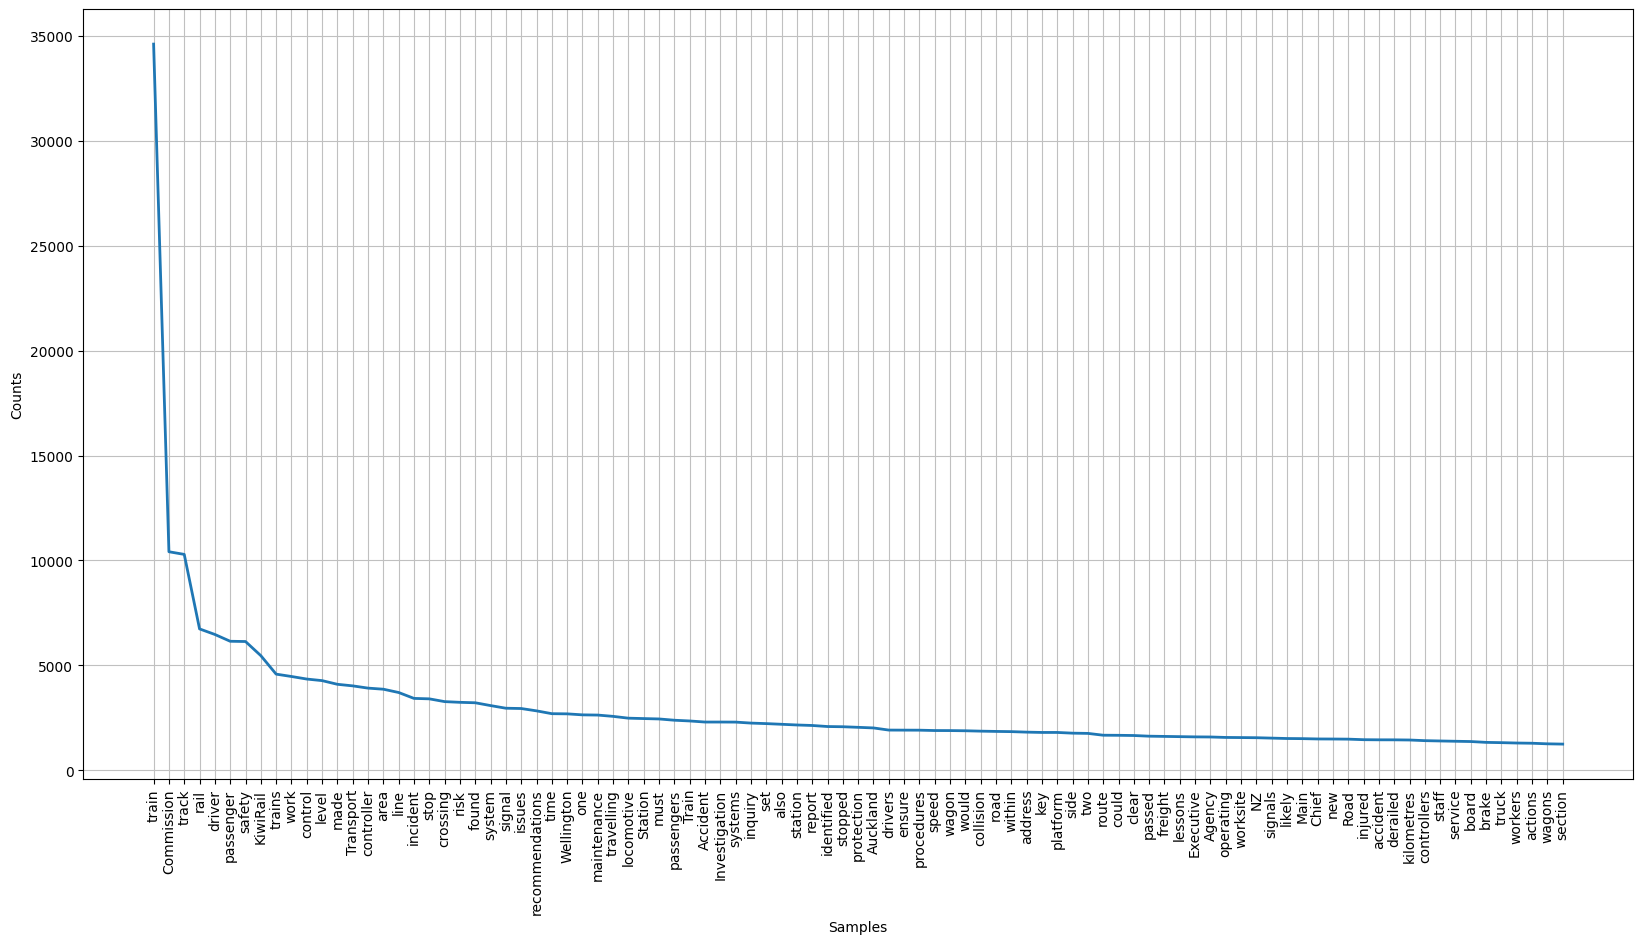

In [ ]:
# Plot frequency distribution of all words that appear in the corpus more than 1250 times
# Displays shy of 100 words (that's a lot of words)

import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))

low_freq = set([word for word in nltk.word_tokenize(taic['corpus']['text']) if taic_fdist[word] < 1250])
for word in low_freq:
  del taic_fdist[word]
taic_fdist.plot()

* The Preprocessing Talk

The frequency distribution doesn't quite follow Zipf's Law - though it does have its shape. Introducing further stopwords like ['Transport', 'Accident', 'Investigation', 'Commission'] should clean some of this up. (Note, this is done retroactively, T:4026 A:2303 I:2303 C:10416 appeared in the 50 most frequent words of the corpus).  

I considered keeping numbers in the data set (for eg locomotive identification) but after removing non-alphanumeric punctuation nothing made sense without context, and you couldn't tell date from train from speed. Some date information is preserved in the filename, enough to use years as a predictor for trends in words. The raw text is also preserved just in case you do want those numbers.

~~

Wellington and Auckland appear in the most common words. This would be expected, as these are the capital, and largest population centre, so a higher rate of incidents is expected. We could use location as a category in future analysis to see what type of accidents areas are at risk of.

In [ ]:
taic_fdist.most_common(50)

[('train', 34601),
 ('Commission', 10416),
 ('track', 10290),
 ('rail', 6740),
 ('driver', 6475),
 ('passenger', 6151),
 ('safety', 6139),
 ('KiwiRail', 5466),
 ('trains', 4585),
 ('work', 4473),
 ('control', 4351),
 ('level', 4276),
 ('made', 4101),
 ('Transport', 4026),
 ('controller', 3919),
 ('area', 3867),
 ('line', 3710),
 ('incident', 3429),
 ('stop', 3408),
 ('crossing', 3276),
 ('risk', 3242),
 ('found', 3221),
 ('system', 3087),
 ('signal', 2961),
 ('issues', 2947),
 ('recommendations', 2836),
 ('time', 2701),
 ('Wellington', 2693),
 ('one', 2645),
 ('maintenance', 2635),
 ('travelling', 2573),
 ('locomotive', 2487),
 ('Station', 2468),
 ('must', 2450),
 ('passengers', 2389),
 ('Train', 2354),
 ('Accident', 2303),
 ('Investigation', 2303),
 ('systems', 2300),
 ('inquiry', 2253),
 ('set', 2228),
 ('also', 2196),
 ('station', 2163),
 ('report', 2139),
 ('identified', 2089),
 ('stopped', 2079),
 ('protection', 2051),
 ('Auckland', 2022),
 ('drivers', 1920),
 ('ensure', 1917)]

In [ ]:
# Prints the 10 most frequent words of each report, and the entire corpus

for key in taic.keys():
  text = taic[key]
  text['ten_most_frequent'] = nltk.FreqDist(nltk.word_tokenize(text['text'])).most_common(10)

  name = text['id']
  most_freq = text['ten_most_frequent']
  print(f'The most frequent words in {name} are {most_freq}')

The most frequent words in RO_2008_106 are [('train', 7), ('track', 7), ('passengers', 5), ('area', 5), ('severe', 5), ('weather', 5), ('carriages', 4), ('response', 4), ('landslide', 4), ('control', 4)]
The most frequent words in RO_2008_107 are [('maintenance', 12), ('trains', 8), ('train', 7), ('depot', 6), ('rail', 5), ('safety', 5), ('KiwiRail', 5), ('passenger', 4), ('motors', 4), ('incidents', 4)]
The most frequent words in RO_2008_108 are [('track', 5), ('warrant', 4), ('locomotive', 4), ('engineer', 4), ('Commission', 3), ('coal', 2), ('limit', 2), ('train', 2), ('operator', 2), ('authorised', 2)]
The most frequent words in RO_2008_109 are [('level', 11), ('Fruitvale', 10), ('Road', 10), ('crossing', 10), ('platform', 7), ('train', 7), ('Train', 5), ('line', 5), ('Station', 5), ('passenger', 4)]
The most frequent words in RO_2008_110 are [('train', 23), ('controller', 8), ('control', 6), ('second', 5), ('previous', 4), ('shift', 3), ('line', 3), ('failure', 3), ('fatigue', 3),

Something I would like to look at in the future is what the most frequent 10, 20, 30, ... words in a report can say about the corpus as a whole and the categories the texts represents.

The metadata in the report ID; year and incident ID can be used to chart this with even further context.

# Further Analysis

* Your attention is once again brought to:
  * Jank fix: please rerun the `import os` block again if there are any problems


In [ ]:
# Generate bigrams of the corpus and display the first 10

corpus = taic['corpus']

metrics(corpus)

corpus_tokens = nltk.word_tokenize(corpus['text'])

corpus_bigrams = list(nltk.bigrams(corpus_tokens))

corpus_bigrams[:10]

[('evening', 'Thursday'),
 ('Thursday', 'July'),
 ('July', 'Wellington'),
 ('Wellington', 'region'),
 ('region', 'experiencing'),
 ('experiencing', 'storm'),
 ('storm', 'brought'),
 ('brought', 'heavy'),
 ('heavy', 'rain'),
 ('rain', 'strong')]

In [ ]:
# Create the frequency distribution

corpus_bigram_fdist = nltk.FreqDist(corpus_bigrams)

In [ ]:
corpus_bigram_fdist.most_common(20)

[(('passenger', 'train'), 3480),
 (('train', 'controller'), 3407),
 (('train', 'control'), 2587),
 (('level', 'crossing'), 2563),
 (('Transport', 'Accident'), 2303),
 (('Accident', 'Investigation'), 2303),
 (('Investigation', 'Commission'), 2303),
 (('Commission', 'Commission'), 2048),
 (('Commission', 'made'), 2044),
 (('train', 'driver'), 1963),
 (('Commission', 'found'), 1813),
 (('safety', 'issues'), 1651),
 (('Transport', 'Agency'), 1546),
 (('Chief', 'Executive'), 1497),
 (('NZ', 'Transport'), 1481),
 (('train', 'controllers'), 1289),
 (('train', 'travelling'), 1216),
 (('safety', 'actions'), 1210),
 (('track', 'warrant'), 1067),
 (('Commission', 'also'), 1066)]

In [ ]:
corpus_fdist = nltk.FreqDist(corpus_tokens)

In [ ]:
# Create a set of bigrams with the word 'train'
train_bigrams = set([bigram for bigram in corpus_bigram_fdist if bigram[0].lower() == 'train'])

train_bigrams

{('Train', 'Control'),
 ('Train', 'another'),
 ('Train', 'approaching'),
 ('Train', 'consisting'),
 ('Train', 'control'),
 ('Train', 'controllers'),
 ('Train', 'conveying'),
 ('Train', 'damaged'),
 ('Train', 'derail'),
 ('Train', 'derailed'),
 ('Train', 'drivers'),
 ('Train', 'empty'),
 ('Train', 'entered'),
 ('Train', 'express'),
 ('Train', 'horn'),
 ('Train', 'km'),
 ('Train', 'passed'),
 ('Train', 'passenger'),
 ('Train', 'platform'),
 ('Train', 'radioed'),
 ('Train', 'scheduled'),
 ('Train', 'stopped'),
 ('Train', 'struck'),
 ('Train', 'train'),
 ('Train', 'travelling'),
 ('Train', 'wagon'),
 ('Train', 'westbound'),
 ('Train', 'would'),
 ('train', 'Capital'),
 ('train', 'Commission'),
 ('train', 'Despite'),
 ('train', 'Early'),
 ('train', 'East'),
 ('train', 'Keen'),
 ('train', 'Kāpiti'),
 ('train', 'Main'),
 ('train', 'Monday'),
 ('train', 'Morningside'),
 ('train', 'Nobody'),
 ('train', 'None'),
 ('train', 'One'),
 ('train', 'Paerata'),
 ('train', 'Papakura'),
 ('train', 'Service

In [ ]:
train_bigram_strengths = dict()

for bigram in train_bigrams:
  train_bigram_strengths[bigram[1]] = (corpus_bigram_fdist[bigram] / corpus_fdist[bigram[1]]) * 100

In [ ]:
train_bigram_strengths['speed']

8.74604847207587

We can see that 9% of the time a train is mentioned in a summary, the following word will be speed. We could look at how many investigation summaries in the corpus contain the phrase 'train speed', and see if this is representative of how many summaries in the corpus discuss rail incidents related to train speed.

In [ ]:
i = -1

for key in taic.keys():
  if(taic[key]['text'].find("train speed") != -1):
    i = i + 1

train_speed_count = i/76
train_speed_count * 100

7.894736842105263

The phrase 'train speed' appears in 8% of summaries. This seems to confirm our initial idea, and would be interesting to look further into whether can discern (or project) how often incidents may occur given key words in the texts.

We will try this with some other bigrams:

    'train brakes'
    'train collision'
    'train yard'

In [ ]:
def bigram_freq(word):
  i = -1
  word = 'train ' + word

  for key in taic.keys():
    if(taic[key]['text'].find(word) != -1):
      i = i + 1

  train_speed_count = i/76
  return train_speed_count * 100

In [ ]:
train_bigram_strengths['brakes']

58.29903978052127

In [ ]:
bigram_freq('brakes')

13.157894736842104

The word 'brakes' follows 'train' more often than 'speed' does (58% of the time!), but only appears in 13% of reports. This could indicate a higher use of technical terms in reports regarding mechanical failures (possibly looking into the contexts that incident-descriptive words appear in).

In [ ]:
train_bigram_strengths['collision']

1.7656500802568218

In [ ]:
bigram_freq('collision')

2.631578947368421

~~Good to see the rate of 'train' 'collision' is ~2%!~~

'train' 'collision' falls more in line with what we see with 'train' 'speed', which furthers the idea of technical terms (or at least brake problems) occuring most frequently in the reports.

In [ ]:
train_bigram_strengths['door']

33.88235294117647

In [ ]:
bigram_freq('door')

2.631578947368421

A problem with a door in two incident reports, with the bigram 'train' 'door' occuring 34% of the time.

In [ ]:
train_bigram_strengths['yard']

8.664259927797833

In [ ]:
bigram_freq('yard')

1.3157894736842104

This confirms what we have thought about techincal terms, occuring in a higher density in the reports they call home, but yard is an interesting case as it could be looked at as an incident location.

# Conclusion

The types and tokens make sense in the context of the corpus, with some of the most frequently occuring words: 'train', 'safety', 'KiwiRail', 'incident', and 'risk' being enough to clue in to what the text is about.

I was surprised by how often the Transport Accident Investigation Commission mentions itself within the reports, each token appearing in the 50 most frequent words after removing punctuation, numbers and headers.

It would be worth getting more comfortable with matlab, as having a visual of the top 10 most frequently words for each summary, and comparing that to the most frequent words across the corpus would be great for having a quick reference for the contents of the report, and simplifying it into a few key most frequent words.

From my observations of 'train' bigrams, incident type seems to have some interesting relationships to unpick, where incidents where technical problems have occurred (brakes, door as opposed to speed, collision). Something to look into could be whether you can make meaningful predictions of a category based on the data collected.

I'd like to further explore categories of year, location, and incident type, as well as possibly extending the scope of my corpus to include earlier eras in New Zealand Rail, or other forms of transport the Commission covers; maritime and air.

In my own time, looking into how the tone and voice of these summaries have changed over time will help me understand how key information is presented by the Commission, and whether there are any significants trends in this language.